In [103]:
#pip install japanmap
#pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from japanmap import picture

In [58]:
newly_confirmed_cases_daily = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv"
requiring_inpatient_care_etc_daily = "https://covid19.mhlw.go.jp/public/opendata/requiring_inpatient_care_etc_daily.csv"
deaths_cumulative_daily = "https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv"
severe_cases_daily = "https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv"

In [59]:
df01 = pd.read_csv(newly_confirmed_cases_daily, index_col="Date")
df01.index = pd.DatetimeIndex(df01.index).date
df02 = pd.read_csv(severe_cases_daily, index_col="Date")
df02.index = pd.DatetimeIndex(df02.index).date
df01 = df01.rolling(7,min_periods=1).mean().round(1)
df02 = df02.rolling(7,min_periods=1).mean().round(1)
df03 = pd.read_csv(deaths_cumulative_daily, index_col="Date")
df03.index = pd.DatetimeIndex(df03.index).date

In [60]:
df01

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
2020-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-17,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-18,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-19,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-20,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10,43691.0,763.9,382.7,195.9,400.9,91.7,124.7,211.7,402.3,273.1,...,515.7,188.9,2441.1,599.0,500.0,1439.3,523.9,482.3,773.6,2136.7
2022-07-11,46595.7,791.7,415.1,214.3,413.1,104.0,133.4,226.1,439.9,289.1,...,526.9,194.0,2634.1,638.6,514.7,1483.0,558.3,519.3,825.0,2176.0
2022-07-12,52285.4,826.3,471.4,242.9,454.3,132.4,151.6,248.7,483.6,336.4,...,588.6,211.3,2981.4,726.1,558.6,1589.3,645.3,579.4,928.7,2343.1
2022-07-13,59238.1,901.7,515.7,296.3,508.4,158.7,172.7,289.3,525.4,397.7,...,633.6,232.9,3383.4,788.6,604.9,1749.0,731.9,669.1,1036.3,2525.6


In [61]:
fig= make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=df01.index, y=df01["ALL"], name="新規陽性者数", width = 1,base=dict(color="blue")))
fig.add_trace(go.Bar(x=df02.index, y=df02["ALL"], name="重症患者数", base=dict(color="purple")))
fig.update_layout(barmode='overlay')
fig.add_trace(go.Scatter(x=df03.index, y=df03["ALL"], name="死亡者数(累計)", line=dict(color="purple")))


fig.show()                         
#fig.to_html(include_plotlyjs='cdn',full_html=False).encode().decode('unicode-escape')

In [62]:
fig= make_subplots(specs=[[{"secondary_y": True}]])
pre = ["ALL","Hokkaido","Aichi","Osaka"]

for idx, prefecture in enumerate(pre):
  fig.add_trace(go.Bar(x=df01.index, y=df01[prefecture],name=(prefecture + "_新規陽性者数")))
  fig.add_trace(go.Bar(x=df02.index, y=df02[prefecture], name=(prefecture + "_重症者数")))
  fig.update_layout(barmode='overlay')
  fig.add_trace(go.Scatter(x=df03.index, y=df03[prefecture], name=(prefecture + "_累計死者数")))
  
fig.show() 

In [63]:
df_today = df01.iloc[-1]
df_today =df_today.rename({"Hokkaido":"北海道", 
                           "Aomori":"青森","Akita":"秋田", "Iwate":"岩手", "Miyagi":"宮城","Yamagata":"山形", "Fukushima":"福島", 
                           "Ibaraki":"茨城", "Tochigi":"栃木", "Gunma":"群馬", "Saitama":"埼玉", "Chiba":"千葉", "Tokyo":"東京", "Kanagawa":"神奈川",
                           "Niigata":"新潟", "Toyama":"富山", "Ishikawa":"石川","Fukui":"福井", "Yamanashi":"山梨", "Nagano":"長野", 
                           "Gifu":"岐阜","Shizuoka":"静岡", "Aichi":"愛知", "Mie":"三重",
                           "Shiga":"滋賀", "Kyoto":"京都", "Osaka":"大阪","Hyogo":"兵庫", "Nara":"奈良", "Wakayama":"和歌山", 
                           "Tottori":"鳥取","Shimane":"島根", "Okayama":"岡山", "Hiroshima":"広島", "Yamaguchi":"山口",
                           "Kagawa":"香川", "Tokushima":"徳島","Ehime":"愛媛", "Kochi":"高知", 
                           "Fukuoka":"福岡", "Saga":"佐賀", "Nagasaki":"長崎", "Kumamoto":"熊本", "Oita":"大分", "Miyazaki":"宮崎", "Kagoshima":"鹿児島", "Okinawa":"沖縄"})
df_today = df_today[1:]

e-stat
> https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200241&tstat=000001039591&cycle=7&year=20210&month=0&tclass1=000001039601&result_back=1&tclass2val=0

In [64]:
df_population = pd.read_excel("https://www.e-stat.go.jp/stat-search/file-download?statInfId=000032110815&fileKind=0", header = 5, skipfooter=1)
df_population = df_population.rename(columns = {"人":"人口"})
df_population = df_population[["都道府県名","人口"]].iloc[1:, :]
df_population["陽性患者数"] = df_today.values
df_population["人口あたりの陽性患者数"] = df_population["陽性患者数"] / df_population["人口"]
df_population

,都道府県名,人口,陽性患者数,人口あたりの陽性患者数
1,北海道,2471013,1017.7,0.000412
2,青森県,597036,581.7,0.000974
3,岩手県,588436,346.0,0.000588
4,宮城県,1113109,566.3,0.000509
5,秋田県,458937,189.9,0.000414
6,山形県,517251,194.6,0.000376
7,福島県,914498,326.0,0.000356
8,茨城県,1458519,586.6,0.000402
9,栃木県,978577,457.4,0.000467
10,群馬県,971459,593.3,0.000611


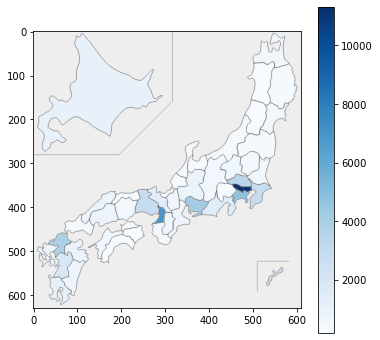

In [65]:
#陽性者総数
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=df_today.min(), vmax=df_today.max())
fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()

plt.rcParams['figure.figsize'] = (6, 6)
plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
plt.imshow(picture(df_today.apply(fcol)))

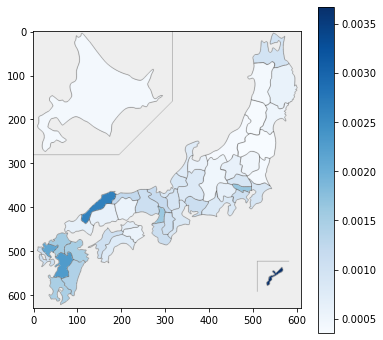

In [66]:
#人口あたりの陽性者数
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=df_population["人口あたりの陽性患者数"].min(), vmax=df_population["人口あたりの陽性患者数"].max())
fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()

plt.rcParams['figure.figsize'] = (6, 6)
plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
plt.imshow(picture(df_population["人口あたりの陽性患者数"].apply(fcol)))